# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

In [3]:
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果
> 由結果可以發現, 在S型的資料時, 雖然 perplexity 越高流形效果越好, 但是並不會接近原圖  
> 這主要是因為資料不像同心圓需要首尾相接, 因此在還原流型時會變成一直線  
> 但同樣也是 perplexity 越高, 時間越長, 效果越好

S-curve, perplexity=4 in 1.9 sec
S-curve, perplexity=6 in 2.1 sec
S-curve, perplexity=9 in 2.3 sec
S-curve, perplexity=14 in 2.7 sec
S-curve, perplexity=21 in 3.6 sec
S-curve, perplexity=30 in 4 sec
S-curve, perplexity=45 in 5.1 sec
S-curve, perplexity=66 in 5.8 sec
S-curve, perplexity=100 in 6.1 sec


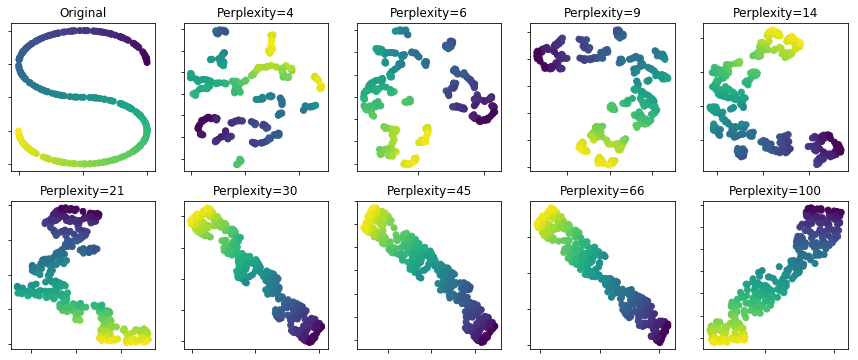

In [4]:
# 繪製不同 perplexity 下的 t-SNE 分群圖 (請注意! 語法也要對應調整)
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()